## zfmlhw09

## 1. 阅读作业
阅读《统计学习方法》中关于决策树剪枝算法内容的节选（资料已经同本周课程内容一并发布）。  
提交一张你阅读的界面截图。学习是自己的事情，请认真理解其中内容，切勿只截图而不阅读。

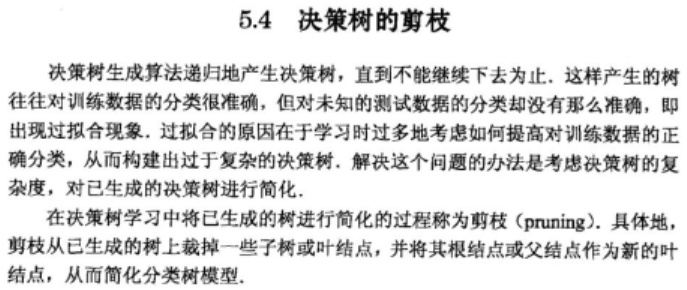

## 2. 问答题
根据表5.1所给的训练数据集，利用信息增益比（C4.5算法）生成决策树。  
注意：
1）详细写出你的计算过程；  
2）你可以利用编程（或程序）来辅助你进行计算，例如求log；  
3）但是你不可以使用现成的函数“一步到位”的直接生成决策树结果。只有结果，而没有过程，将会收到一张【红牌】。
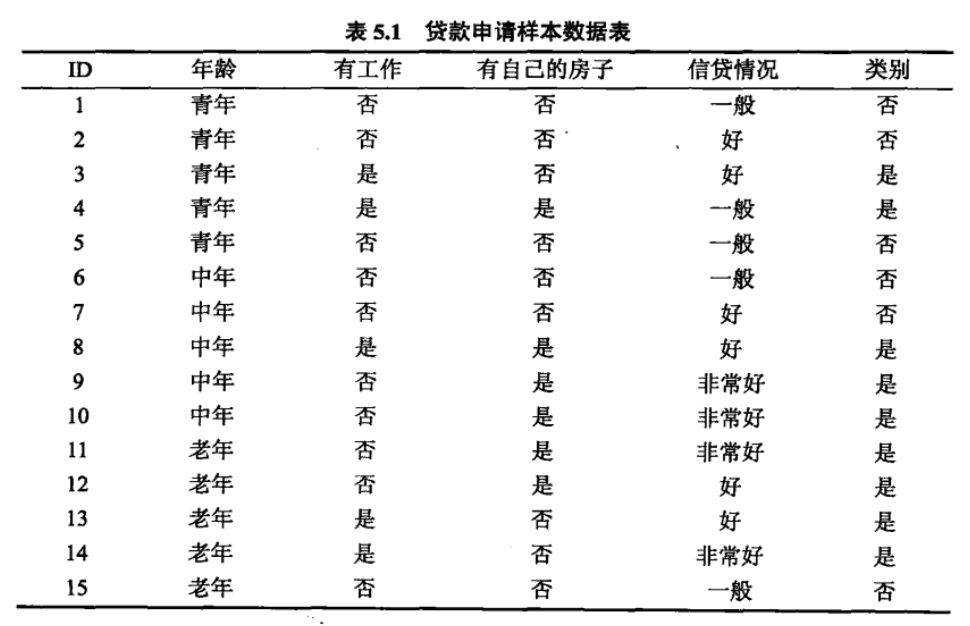

In [18]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'年龄':['青年']*5+['中年']*5+['老年']*5, 
                   '有工作':['否','否','是','是','否','否','否','是','否','否','否','否','是','是','否'],
                  '有自己的房子':['否','否','否','是','否','否','否','是','是','是','是','是','否','否','否'],
                  '信贷情况':['一般','好','好','一般','一般','一般','好','好','非常好','非常好','非常好','好','好','非常好','一般'],
                  '类别':['否','否','是','是','否','否','否','是','是','是','是','是','是','是','否']})
df

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [76]:
def dtC45(df, featureCols, classCol, e=0):
    '''
    利用c4.5生成决策树
    
    df: 训练数据集
    featureCols: 特征所在列名list
    classCol: 类别所在列名
    e: 阈值
    return
        决策树T
    '''
    T = dict()
    # 如果D中所有实例数据同一类Ck，则T为单节点树
    if df[classCol].unique().shape[0] == 1:
        T['node'] = classCol
        T['class_'] = df[classCol].unique()[0]
        return T
    # 如果特征集为空，
    if len(featureCols) == 0:
        T['node'] = classCol
        T['class_'] = df[classCol].value_counts().sort_values(ascending=False).index[0]
        return T
    def calEntropy(df, col):
        colVals = df[col].unique()
        entropy = 0
        n = df.shape[0]
        for i in colVals:
            n1 = df[df[col]==i].shape[0]
            if n1 == 0:
                continue
            entropy += -(n1/n)* np.log2(n1/n)
        return entropy
    def calGain(df, featureCol, classCol):
        '''
        计算某个特征下的信息增益
        '''
        #计算该特征下目标类的信息熵
        entropy = calEntropy(df, classCol)
        num = df.shape[0]
        features = df[featureCol].unique()
        for f in features:
            #计算每个特征值的加权信息熵
            num1 = df[df[featureCol]==f].shape[0]
            entropy1 = calEntropy(df[df[featureCol]==f], classCol)
            entropy -= num1/num*entropy1
        return entropy
    def calGainRatio(df, featureCol, classCol):
        '''
        计算某个特征下的信息增益比
        '''
        num = df.shape[0]
        a = df[featureCol].value_counts()
        splitInfo = 0
        for i in a.values:
            splitInfo -= i/num * np.log2(i/num)
        gainRatio = calGain(df, featureCol, classCol)/splitInfo
        return gainRatio
    # 计算各个特征的gainRatio
    l1 = list()
    for f in featureCols:
        l1.append(calGainRatio(df, f, classCol))
#         print(f, calGainRatio(df, f, classCol))
    T['node'] = featureCols[np.argmax(np.array(l1))]
    T['class_'] = df[classCol].value_counts().sort_values(ascending=False).index[0]
    T['GainRatio'] = l1[np.argmax(np.array(l1))]
    return T

In [77]:
def dtTreeC45(df, featureCols, classCol):
#     if len(T.keys())==0:
    T = dtC45(df, featureCols, classCol)
    if T['node'] == classCol:
        return T
    else:
        for f in df[T['node']]:
            if T['node'] != classCol:
                cols = df.columns.drop(T['node'])
            df1 = df[df[T['node']]==f][cols]
            T[f] = dtTreeC45(df1, df1.columns[:-1],df1.columns[-1])
    return T

In [78]:
dtTreeC45(df, df.columns[:-1],df.columns[-1])

{'node': '有自己的房子',
 'class_': '是',
 'GainRatio': 0.4325380677663126,
 '否': {'node': '有工作',
  'class_': '否',
  'GainRatio': 1.0,
  '否': {'node': '类别', 'class_': '否'},
  '是': {'node': '类别', 'class_': '是'}},
 '是': {'node': '类别', 'class_': '是'}}

### 结果解释
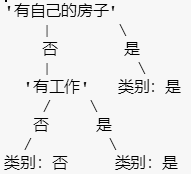

## 3. 编程实践题
基于文章（http://blog.csdn.net/baimafujinji/article/details/53239581）给出的数据集，请构建一个CART决策树。要求如下（如果刻意偷工减料不遵守以下要求，你有可能会收到一张【红牌】）：  
1）你需要使用Python（可以参考课上讲解的内容及给出的scikit-learn文档链接）。  
2）你需要用一个.csv文件来存储你的数据集，然后在Python代码中读入这个数据。  
3）你需要使用课上介绍的graphviz来辅助展示你构建完成的决策树。  
或者：  
1）你可以使用R（此时你可以考虑使用rpart包，参考https://cran.r-project.org/web/packages/rpart/rpart.pdf）  
2）你需要用一个.csv文件来存储你的数据集，然后在R代码中读入这个数据。  
3）你需要使用图形化的方式来展示你构建完成的决策树。

In [109]:
import pandas as pd
from sklearn import tree
import graphviz

In [98]:
df = pd.read_csv('zf09hwdata.csv', index_col=0)
df.head()

,Outlook,Temperature,Humidity,Wind,Play ball
Day,,,,,
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes


In [99]:
Outlook_mapping = dict(zip(df['Outlook'].unique(),range(len(df['Outlook'].unique()))))
Outlook_mapping

{'Sunny': 0, 'Overcast': 1, 'Rain': 2}

In [100]:
Temperature_mapping = dict(zip(df['Temperature'].unique(),range(len(df['Temperature'].unique()))))
Temperature_mapping

{'Hot': 0, 'Mild': 1, 'Cool': 2}

In [101]:
Humidity_mapping = dict(zip(df['Humidity'].unique(),range(len(df['Humidity'].unique()))))
Humidity_mapping

{'High': 0, 'Normal': 1}

In [102]:
Wind_mapping = dict(zip(df['Wind'].unique(),range(len(df['Wind'].unique()))))
Wind_mapping

{'Weak': 0, 'Strong': 1}

In [103]:
Play_ball_mapping = dict(zip(df['Play ball'].unique(),range(len(df['Play ball'].unique()))))
Play_ball_mapping

{'No': 0, 'Yes': 1}

In [104]:
df['Outlook'] = df['Outlook'].map(Outlook_mapping)
df['Temperature'] = df['Temperature'].map(Temperature_mapping)
df['Humidity'] = df['Humidity'].map(Humidity_mapping)
df['Wind'] = df['Wind'].map(Wind_mapping)
df['Play ball'] = df['Play ball'].map(Play_ball_mapping)
df.head()

,Outlook,Temperature,Humidity,Wind,Play ball
Day,,,,,
D1,0,0,0,0,0
D2,0,0,0,1,0
D3,1,0,0,0,1
D4,2,1,0,0,1
D5,2,2,1,0,1


In [105]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [106]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
df.columns[-1]

'Play ball'

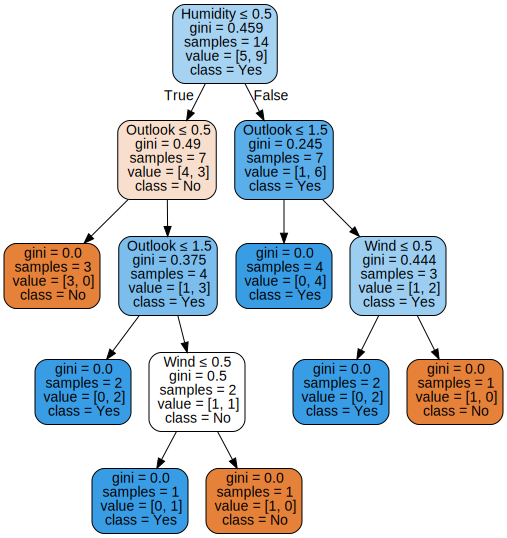

In [119]:
dot_data1 = tree.export_graphviz(clf, out_file=None,
                                feature_names = df.columns[:-1],
                                class_names = ['No','Yes'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data1)
graph

## end

## end

## end

## end

## end

## end

## end